<a href="https://colab.research.google.com/github/EricSnunes/AnaliseDeDados/blob/main/detec%C3%A7%C3%A3oDeFraudesEmTransa%C3%A7%C3%B5esFinanceiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Métricas para LogisticRegression
Matriz de Confusão:
[[83670  1479]
 [ 3284 82156]]


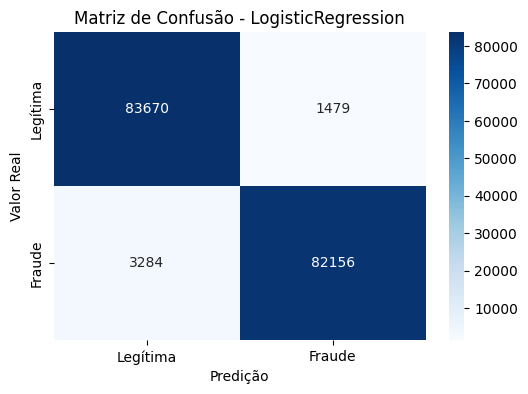

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85149
           1       0.98      0.96      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

AUC-ROC: 0.9935997493631235


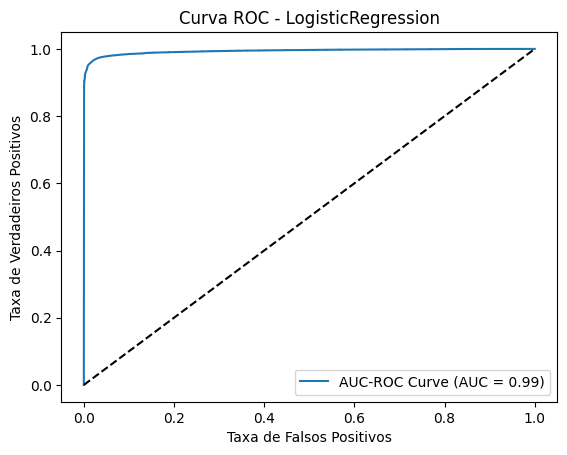


Métricas para DecisionTreeClassifier
Matriz de Confusão:
[[84909   240]
 [   91 85349]]


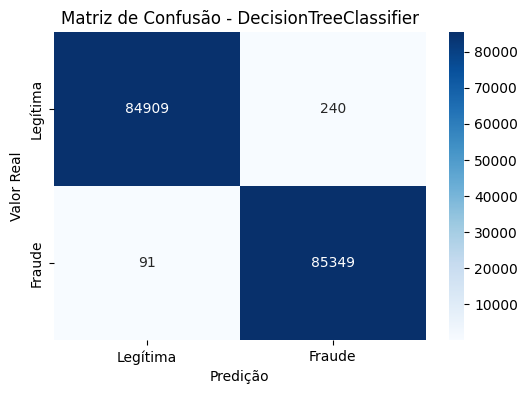

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

AUC-ROC: 0.9980581682509352


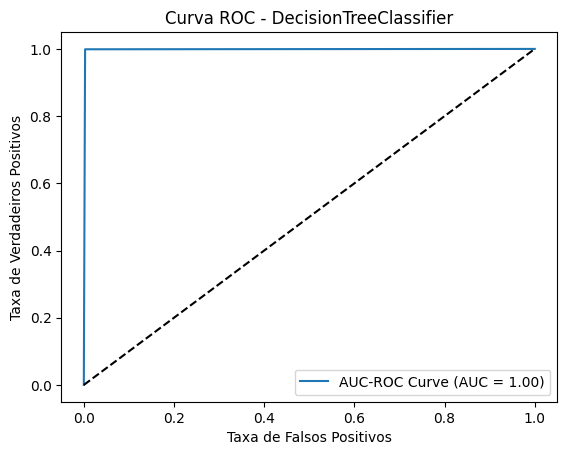


Resultados Comparativos entre Modelos:
LogisticRegression: AUC-ROC = 0.9936, F1-score Minor Class = 0.9718
DecisionTreeClassifier: AUC-ROC = 0.9981, F1-score Minor Class = 0.9981

Melhor modelo: DecisionTreeClassifier com AUC-ROC = 0.9981 e F1-score Minor Class = 0.9981


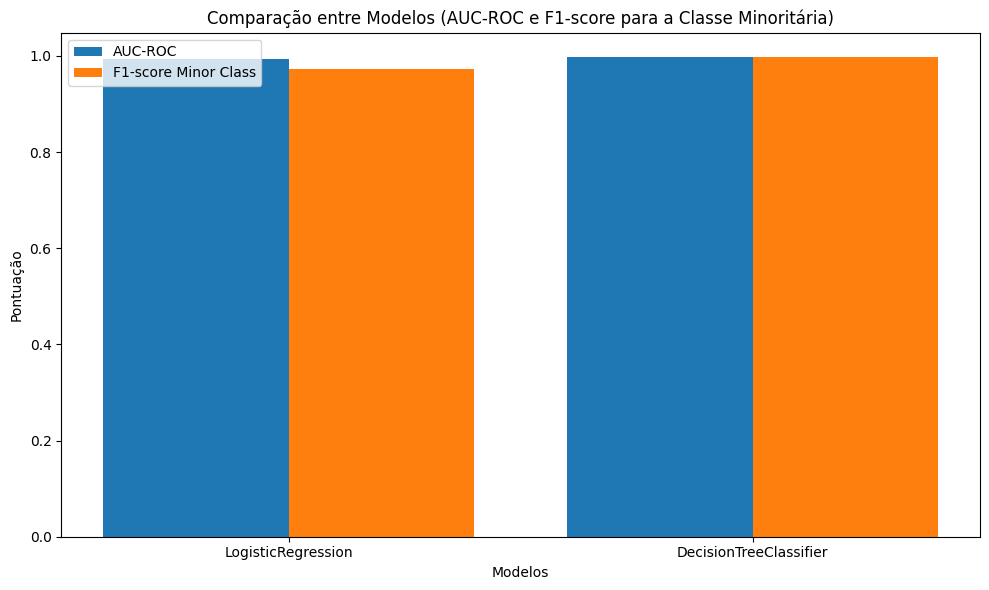

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Função para calcular e exibir métricas de avaliação
def evaluate_model(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítima", "Fraude"], yticklabels=["Legítima", "Fraude"])
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_proba)
    print("AUC-ROC:", roc_auc)

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label="AUC-ROC Curve (AUC = {:.2f})".format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(f"Curva ROC - {type(model).__name__}")
    plt.legend(loc="lower right")
    plt.show()

    # Retornar métricas relevantes para comparação
    f1_minor_class = report["1"]["f1-score"]  # F1-score para a classe "fraude"
    return roc_auc, f1_minor_class

# Carregar dados e verificar a distribuição original
data = pd.read_csv("creditcard.csv")

# Preparar variáveis independentes e dependentes
X = data.drop('Class', axis=1)
y = data['Class']

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Modelos a serem comparados
models = [LogisticRegression(), DecisionTreeClassifier()]
results = {}

# Avaliar cada modelo
for model in models:
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, model)
    results[type(model).__name__] = {
        "AUC-ROC": roc_auc,
        "F1-score Minor Class": f1_score_minor
    }

# Exibir resultados comparativos
print("\nResultados Comparativos entre Modelos:")
for model_name, metrics in results.items():
    print(f"{model_name}: AUC-ROC = {metrics['AUC-ROC']:.4f}, F1-score Minor Class = {metrics['F1-score Minor Class']:.4f}")

# Identificar o melhor modelo com base em AUC-ROC e F1-score
best_model = max(results, key=lambda x: (results[x]["AUC-ROC"], results[x]["F1-score Minor Class"]))
print(f"\nMelhor modelo: {best_model} com AUC-ROC = {results[best_model]['AUC-ROC']:.4f} e F1-score Minor Class = {results[best_model]['F1-score Minor Class']:.4f}")

# Gráfico Comparativo dos Resultados
model_names = list(results.keys())
auc_scores = [results[model]["AUC-ROC"] for model in model_names]
f1_scores = [results[model]["F1-score Minor Class"] for model in model_names]

plt.figure(figsize=(10, 6))
x = range(len(model_names))
plt.bar([p - 0.2 for p in x], auc_scores, width=0.4, label='AUC-ROC', align='center')
plt.bar([p + 0.2 for p in x], f1_scores, width=0.4, label='F1-score Minor Class', align='center')
plt.xticks(x, model_names)
plt.xlabel("Modelos")
plt.ylabel("Pontuação")
plt.title("Comparação entre Modelos (AUC-ROC e F1-score para a Classe Minoritária)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()